In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from skimage import io

In [2]:
!dir album_covers

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: B845-3C51

 Directorio de C:\Users\abeltran\Desktop\Curso_DataScience\08_Dimensionalidad_y_agrupacion\Actividad_14\act14-fds-master\album_covers

06/10/2018  08:57    <DIR>          .
06/10/2018  08:57    <DIR>          ..
24/09/2018  10:45             6.148 .DS_Store
24/09/2018  10:45           300.260 alt-j-this-is-all-yours.jpg
24/09/2018  10:45            94.751 altar-of-plagues-teethed-glory-and-injury.jpg
24/09/2018  10:45           147.352 avalanches-since-i-left-you.jpg
24/09/2018  10:45            62.222 backstreet-boys-millenium.jpg
24/09/2018  10:45            42.512 big-krit-4eva-is-a-mighty.webp
24/09/2018  10:45           173.614 britney-spears-baby-one-more-time.jpg
24/09/2018  10:45           158.334 brockhampton-saturation-ii.jpg
24/09/2018  10:45            34.730 car-bomb-meta.jpg
24/09/2018  10:45            49.463 carly-rae-jepsen-emotion-side-b.jpg
24/09/2018  10:45           916.944

In [3]:
nails = io.imread('album_covers/epica-TheHolographicPrinciple.jpg')
type(nails)

numpy.ndarray

In [4]:
nails.shape

(500, 500, 3)

C:\Users\abeltran\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\abeltran\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


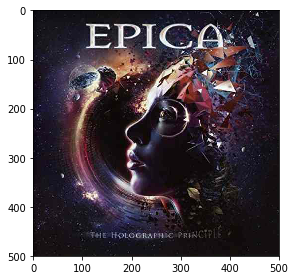

In [5]:
io.imshow(nails)#La representación el equivalente

In [6]:
height, width, dims = nails.shape

In [7]:
#Un comando que permite reescalar, funciona solo en numpay
reshape_nails = nails.reshape(height * width, dims)

In [8]:
modelo_kmeans = KMeans(n_clusters = 16)

In [9]:
modelo_kmeans.fit(reshape_nails)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
modelo_kmeans.cluster_centers_.shape #Centroides, va a estar caractrizando los principales colores que van a caracterizar mejor la imagen

(16, 3)

In [11]:
extract_centers = modelo_kmeans.cluster_centers_
#Se debe reondear proque los colores rgb solo funcionan con numeros enteros
new_colors_pred = modelo_kmeans.cluster_centers_[modelo_kmeans.predict(reshape_nails)].astype(int)

In [12]:
new_colors_pred

array([[17, 10, 13],
       [17, 10, 13],
       [17, 10, 13],
       ...,
       [22, 17, 25],
       [22, 17, 25],
       [22, 17, 25]])

In [13]:
#Los colores unicos y cada ocurrencia de ellos 

In [14]:
unique, count = np.unique(modelo_kmeans.labels_, return_counts=True)

In [15]:
unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [16]:
def rgb_hex_it(rgb):
    tmp = list(map(lambda x: int(x), rgb))
    return '#%02x%02x%02x' % (tmp[0], tmp[1], tmp[2])

In [17]:
hex_holder = list(map(lambda x: rgb_hex_it(x), extract_centers))

In [18]:
np.unique(hex_holder)

array(['#110a0d', '#161119', '#1e1927', '#2c2638', '#32181e', '#3f374b',
       '#4c272e', '#554c60', '#6c3b3e', '#6f667a', '#8c5857', '#8d8595',
       '#af7f6f', '#bea9a2', '#d5ccc8', '#efedec'], dtype='<U7')

In [22]:
import pandas as pd
demo = pd.concat([pd.Series(hex_holder), 
                 pd.Series(count)], axis = 1)

demo.columns=['hex', 'count']

demo['percentage'] = demo['count'] /np.sum(demo['count'])
demo = demo.sort_values(by='percentage', ascending = False)

In [23]:
demo

,hex,count,percentage
14,#161119,66080,0.264320
3,#110a0d,50583,0.202332
7,#1e1927,32133,0.128532
13,#2c2638,21884,0.087536
4,#3f374b,14773,0.059092
0,#32181e,10079,0.040316
8,#554c60,8755,0.035020
11,#4c272e,8351,0.033404
9,#6c3b3e,5969,0.023876
2,#6f667a,5760,0.023040


<BarContainer object of 16 artists>

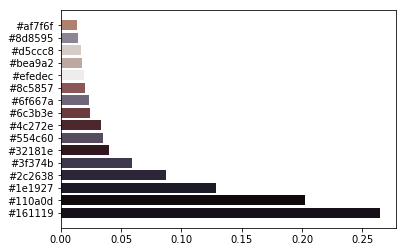

In [24]:
plt.barh(demo['hex'], demo['percentage'], color= demo['hex'])